# Comparison Testing model RF vs Ensemble (RF, XB, SV, NB)
---
kita akan melakukan testing model untuk ensemble dan RF dan membandingkan dengan hasil model yang sudah kita latih sebelum nya

## 1. Import Library yang dibutuhkan
---
pada tahap imi kita akan mencoba untuk memanggil library apa saja yng digunakan untuk membandingkan algoritma ensemble dengan random forest

In [1]:
# Import library yang diperlukan
import numpy as np  # Untuk operasi numerik
import pandas as pd  # Untuk manipulasi data
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Untuk visualisasi data yang lebih menarik
import joblib  # Untuk menyimpan dan memuat model

# Import model dan fungsi dari scikit-learn
from sklearn.naive_bayes import GaussianNB  # Model Naive Bayes
from sklearn.svm import SVC  # Support Vector Classifier
from xgboost import XGBClassifier  # XGBoost Classifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold  # Untuk split data dan cross-validation
from sklearn.ensemble import RandomForestClassifier, VotingClassifier  # Random Forest dan Voting Classifier
from sklearn.metrics import accuracy_score, classification_report, auc, roc_curve, f1_score, confusion_matrix  # Untuk evaluasi model


## 2. Load datasheet 
---
Load datashet yang digunakan untuk proses analisis

In [2]:
# Load datasheet dari direltori data 
data = pd.read_csv('../Data/preprocessing.csv')

# Tampilkan isi dari datasheet
print(data)

     Gender  Height  Weight  Index
0         1     174      96      4
1         1     189      87      2
2         0     185     110      4
3         0     195     104      3
4         1     149      61      3
..      ...     ...     ...    ...
495       0     150     153      5
496       0     184     121      4
497       0     141     136      5
498       1     150      95      5
499       1     173     131      5

[500 rows x 4 columns]


## 3. Setting Hyperparameter Model
---
Setting hyperparameter untuk membuat model kita memiliki akurasi yang baik dan sebisa mungkin untuk terhindari dari overfitting dan underfitting

In [3]:
# Pisahkan fitur (X) dan label (y) dari dataset
X = data.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir sebagai fitur
y = data.iloc[:, -1]  # Kolom terakhir sebagai label

# 2. Split data menjadi train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Membagi data menjadi set pelatihan dan pengujian dengan rasio 80:20

# 3. Inisialisasi model individu
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Model Random Forest dengan 100 pohon
svm_model = SVC(probability=True, kernel="linear", random_state=42)  # Model SVM dengan kernel linear dan probabilitas
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)  # Model XGBoost
nb_model = GaussianNB()  # Model Naive Bayes

# 4. Inisialisasi VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ("rf", rf_model),  # Model Random Forest
        ("svm", svm_model),  # Model SVM
        ("xgb", xgb_model),  # Model XGBoost
        ("nb", nb_model)  # Model Naive Bayes
    ],
    voting="soft"  # Gunakan 'soft' untuk rata-rata probabilitas, atau 'hard' untuk mayoritas
)
# VotingClassifier menggabungkan beberapa model untuk membuat prediksi yang lebih baik

## Latih model dan tampilkan hasil pelatihan

In [4]:
# 5. Latih VotingClassifier
print("Training Voting Classifier...")
voting_clf.fit(X_train, y_train)

# 6. Evaluasi model
print("Evaluating Voting Classifier...")
y_pred = voting_clf.predict(X_test)

# Accuracy and F1 Score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training Voting Classifier...


c:\Users\AlanFirdaus-ITMS\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:28:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluating Voting Classifier...
Accuracy: 0.9100
F1 Score: 0.9106

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.67      1.00      0.80         4
           2       1.00      0.83      0.91        18
           3       0.89      1.00      0.94         8
           4       0.93      0.87      0.90        30
           5       0.90      0.95      0.93        39

    accuracy                           0.91       100
   macro avg       0.90      0.94      0.91       100
weighted avg       0.92      0.91      0.91       100



<b>Insight :</b>
Berbeda dengan model RF yang sudah kita latih sebelumya dengan menggunakan voting classifier kita bisa meningkatkan akurasi model darinyang tadinya sebesar 81 % menjadi 91 % artinya model kita hampir mengenali semua data pelatihan, meskipun begitu kit akan mencoba untuk melakukan pengukuran dengan data baru untuk melihat apakah model kita mengalami overfitting atau malah underfitting. Apabila model tetep menunjukan akurasi yang baik ini berarti model kita sudah siap untuk digunakan di lingkungan produksi 

## 4. Ukur akurasi model ensemble 
---
ukur akurasi model yang sudah dilatih dan menghitung jumlah prediksi yang bernilai benar dan salah 

In [5]:
rfc_acc = accuracy_score(y_test, y_pred)

#Compute performance manually
NewprediksiBenar = (y_pred == y_test).sum() # jika prediksi == dengan y test maka bernilai True
NewprediksiSalah = (y_pred != y_test).sum() # jika prediksi != dengan y test maka bernilai false 

print("prediksi benar: ", NewprediksiBenar, " data") # Tulis jumlah prediksi yang bernilai benar 
print("prediksi salah: ", NewprediksiSalah, " data") # Tulis jumlah prediksi yang bernilai salah 
# Hitung jumlah prediksi benar dibagi dengan jumlah prediksi salah 
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

# Buat variabel untuk mengukur kinerja dari model 
CM = confusion_matrix(y_test, y_pred)

TN = CM[0][0] # True Negative 
FN = CM[1][0] # False Negatif
TP = CM[1][1] # True Positive 
FP = CM[0][1] # False Positive 

precision    = TP/(TP+FP) # Perhitungan precision 
recall       = TP/(TP+FN) # perhitungan recall 

print ("TRUE NEGATIVE (TN)  :", TN) 
print ("FALSE NEGATIVE (FN) :", FN) 
print ("TRUE POSITIVE (TP)  :", TP)
print ("FALSE POSITIVE (FP) :", FP)

# hitung precision dan recall serta tampilan report dari hasil pelatihan model 
print ("PRECISION :", precision*100,"%")
print ("RECALL    :", recall*100,"%")
print(classification_report(y_test, y_pred))

prediksi benar:  91  data
prediksi salah:  9  data
Akurasi Algoritme:  91.0 %
TRUE NEGATIVE (TN)  : 1
FALSE NEGATIVE (FN) : 0
TRUE POSITIVE (TP)  : 4
FALSE POSITIVE (FP) : 0
PRECISION : 100.0 %
RECALL    : 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.67      1.00      0.80         4
           2       1.00      0.83      0.91        18
           3       0.89      1.00      0.94         8
           4       0.93      0.87      0.90        30
           5       0.90      0.95      0.93        39

    accuracy                           0.91       100
   macro avg       0.90      0.94      0.91       100
weighted avg       0.92      0.91      0.91       100



<b>Insight :</b>
Berdasarkan hasil output berikut ternyata model kita bisa berhasil menangkap 91 data benar dengan hanya menyisakan 9 data yang bernilai salah jumlah TN = 1, FN =0 dan TP = 4, FP = 0 jumlah precession dan recall = 100 % menunjukan bahwa model kit sudah cukup baik sejauh ini

## 5 Test model terhadap data baru 
---
setelah dirasa model sudah cukup baik, kita akan menyimpan model dalam bentuk format joblib

In [6]:
# Simpan model VotingClassifier ke dalam file joblib

joblib_file = "voting_classifier_model.joblib"

# joblib.dump(voting_clf, joblib_file)
# print(f"Model disimpan ke {joblib_file}")

## Evaluasi model pada data uji
---
kita akan melakkan evaluasi pda data uji dan melakukan perhitungan berapa kesalahan model kita terhadap data baru 

In [7]:
# 7. Evaluasi model pada data uji
print("Evaluating Voting Classifier...")
y_pred = voting_clf.predict(X_test)

# Accuracy and F1 Score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Evaluating Voting Classifier...
Accuracy: 0.9100
F1 Score: 0.9106

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.67      1.00      0.80         4
           2       1.00      0.83      0.91        18
           3       0.89      1.00      0.94         8
           4       0.93      0.87      0.90        30
           5       0.90      0.95      0.93        39

    accuracy                           0.91       100
   macro avg       0.90      0.94      0.91       100
weighted avg       0.92      0.91      0.91       100



## Buat data baru dan test dengan model yang sudah dilatih 
---
kita akan membuat data baru secara random untuk menguji ketahana model kita terhadap data baru yang di uji sebelum model tersbeut akan digunakan pada lingkungan produksi

In [8]:
# 8. Membuat data baru untuk pengujian
new_data = np.array([
    [1, 170.5, 60.3],  # Gender, Height, Weight
    [0, 180.1, 85.7],
    [1, 151.0, 78.1],
    [0, 165.3, 70.0],
    [1, 175.2, 80.5],
    [0, 150.4, 45.3],
    [1, 160.7, 55.8],
    [0, 190.0, 95.2],
    [1, 168.8, 75.4],
    [0, 178.5, 65.6],
])

# 9. Load model dari joblib dan prediksi data baru
print("Loading model from joblib file...")
loaded_model = joblib.load(joblib_file)

print("Predicting new data...")
predictions = loaded_model.predict(new_data)

Loading model from joblib file...
Predicting new data...


## Konversi hasil prediksi ke keterangan kelas 

In [9]:
# Konversi hasil prediksi ke keterangan kelas
class_mapping = {
    0: "Extreme Weak",
    1: "Weak",
    2: "Normal",
    3: "Overweight",
    4: "Obesity",
    5: "Extreme Obesity"
}
predicted_classes = [class_mapping[pred] for pred in predictions]

# Konversi Gender menjadi deskripsi
gender_mapping = {1: "Laki-laki", 0: "Perempuan"}

# Tampilkan hasil prediksi
results = pd.DataFrame(new_data, columns=["Gender", "Height", "Weight"])
results["Gender"] = results["Gender"].map(gender_mapping)  # Gunakan map untuk mengganti nilai
results["Predicted_Class"] = predictions
results["Class_Description"] = predicted_classes

## Tampilkan Hasil Prediksi Data Baru 

In [10]:
print("\nPredictions on New Data:")
print(results)


Predictions on New Data:
      Gender  Height  Weight  Predicted_Class Class_Description
0  Laki-laki   170.5    60.3                2            Normal
1  Perempuan   180.1    85.7                3        Overweight
2  Laki-laki   151.0    78.1                4           Obesity
3  Perempuan   165.3    70.0                3        Overweight
4  Laki-laki   175.2    80.5                3        Overweight
5  Perempuan   150.4    45.3                2            Normal
6  Laki-laki   160.7    55.8                2            Normal
7  Perempuan   190.0    95.2                3        Overweight
8  Laki-laki   168.8    75.4                3        Overweight
9  Perempuan   178.5    65.6                2            Normal


<Figure size 1000x800 with 0 Axes>

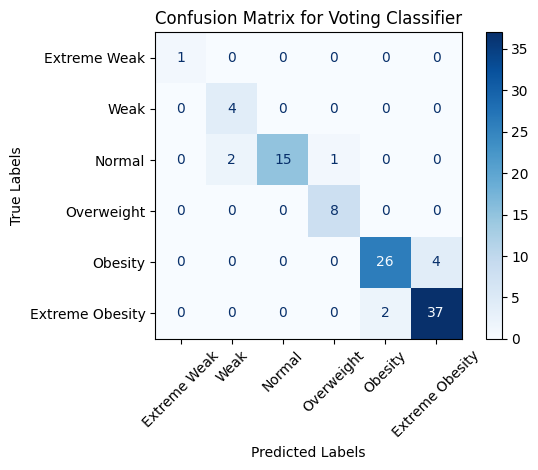

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Buat label kelas untuk deskripsi
class_labels = ["Extreme Weak", "Weak", "Normal", "Overweight", "Obesity", "Extreme Obesity"]

# Visualisasi confusion matrix menggunakan ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)

# Konfigurasi visualisasi
plt.figure(figsize=(10, 8))  # Atur ukuran plot
disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation=45)  # Warna dan format nilai
plt.title("Confusion Matrix for Voting Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.grid(False)  # Hilangkan grid
plt.tight_layout()
plt.show()

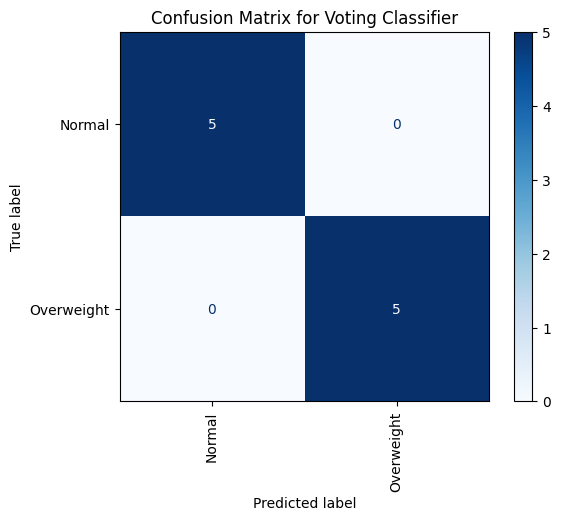

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib

# Data baru untuk pengujian
new_data = np.array([
    [1, 170.5, 60.3],
    [0, 180.1, 85.7],
    [1, 155.0, 50.1],
    [0, 165.3, 70.0],
    [1, 175.2, 80.5],
    [0, 150.4, 45.3],
    [1, 160.7, 55.8],
    [0, 190.0, 95.2],
    [1, 168.8, 75.4],
    [0, 178.5, 65.6],
])

# Label sebenarnya
true_labels = [2, 3, 2, 3, 3, 2, 2, 3, 3, 2]

# Load model dari file joblib
joblib_file = "../Notebook/voting_classifier_model.joblib"
loaded_model = joblib.load(joblib_file)

# Prediksi data baru
predictions = loaded_model.predict(new_data)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Dapatkan kelas unik yang terlibat
unique_classes = np.unique(np.concatenate((true_labels, predictions)))

# Definisikan nama kelas berdasarkan kelas unik
class_mapping = {
    0: "Extreme Weak",
    1: "Weak",
    2: "Normal",
    3: "Overweight",
    4: "Obesity",
    5: "Extreme Obesity",
}
class_names = [class_mapping[c] for c in unique_classes]

# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation="vertical")
plt.title("Confusion Matrix for Voting Classifier")
plt.show()
